<h1>Data Cleaning</h1>

In [2]:
# Importing necessary libraries
import warnings
warnings.simplefilter("ignore")

# Essential imports for data analysis for visualization 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


# Imports for offline interactive plotting
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import cufflinks as cf
cf.go_offline()

# Setting style and inline plotting
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#loading csv file into pandas dataframe
df = pd.read_csv ('C:/Users/fawad/Desktop/datasets/NCDB/NCDB_1999_to_2017.csv')

In [4]:
#Exploring our data
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1,1,20,2,02,34,UU,1,5,...,06,1990,01,M,41,11,1,UU,1,752
1,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,01,M,19,11,1,UU,1,752
2,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,02,F,20,13,2,02,2,752
3,1999,1,1,08,2,01,01,UU,5,3,...,01,1986,01,M,46,11,1,UU,1,753
4,1999,1,1,08,2,01,01,UU,5,3,...,NN,NNNN,01,M,05,99,2,UU,3,753


In [5]:
df.tail()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
6772558,2017,UU,U,UU,2,UU,UU,01,U,U,...,01,UUUU,01,F,20,11,1,NN,1,2455828
6772559,2017,UU,U,UU,2,UU,UU,01,U,U,...,01,UUUU,01,F,47,11,1,NN,1,2455828
6772560,2017,UU,U,UU,2,UU,UU,01,U,U,...,07,UUUU,01,M,24,11,1,NN,1,2455828
6772561,2017,UU,U,23,2,01,03,01,1,1,...,16,UUUU,01,M,45,96,2,09,U,2570233
6772562,2017,UU,U,23,2,01,03,01,1,1,...,16,UUUU,02,F,45,96,2,09,U,2570233


In [6]:
df.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER', 'C_CASE'],
      dtype='object')

In [7]:
df.describe()

,C_YEAR,C_SEV,C_CASE
count,6.772563e+06,6.772563e+06,6.772563e+06
mean,2.007342e+03,1.983390e+00,1.273550e+06
std,5.453422e+00,1.278037e-01,7.423937e+05
min,1.999000e+03,1.000000e+00,1.000000e+00
25%,2.003000e+03,2.000000e+00,6.263120e+05
50%,2.007000e+03,2.000000e+00,1.271499e+06
75%,2.012000e+03,2.000000e+00,1.914983e+06
max,2.017000e+03,2.000000e+00,2.570235e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772563 entries, 0 to 6772562
Data columns (total 23 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
 22  C_CASE  int64 
dtypes: int64(3), object(20)
memory usage: 1.2+ GB


In [9]:
#dropping columns that we dont find interesting for our analysis
df.drop(['V_ID', 'P_ID', 'C_CASE', 'C_VEHS', 'C_RCFG', 'C_RALN', 'C_TRAF', 'V_YEAR', 'P_ISEV', 'P_SAFE', 'P_USER', 'C_CASE' ], axis=1, inplace=True)

In [10]:
#giving columns meaningful names
df.rename(columns={'C_YEAR': 'YEAR', 'C_MNTH': 'MNTH', 'C_WDAY': 'DAY', 'C_HOUR': 'TIME', 'C_SEV': 'SEVERITY', 'C_CONF': 'Collision CONF.', 'C_WTHR': 'WEATHER', 'C_RSUR': 'RD. SURFACE', 'V_TYPE': 'VEHICLE TYPE', 'P_SEX': 'GENDER', 'P_AGE': 'AGE', 'P_PSN': 'PERSON POSITION'}, inplace=True)

In [11]:
#Lets see how the columns look now
df.columns

Index(['YEAR', 'MNTH', 'DAY', 'TIME', 'SEVERITY', 'Collision CONF.', 'WEATHER',
       'RD. SURFACE', 'VEHICLE TYPE', 'GENDER', 'AGE', 'PERSON POSITION'],
      dtype='object')

In [12]:
#getting all the unique values in columns
for col in df:
    print(df[col].unique())

[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
[1 2 3 4 5 6 7 8 9 10 11 12 '12' 'UU' '01' '02' '11']
[1 2 3 4 5 6 7 '7' 'U' '1' '2' '3' '4' '5' '6']
['20' '08' '17' '15' '14' '01' '11' '13' '19' '16' '09' '02' '18' '12'
 '10' '23' '00' '06' '07' '21' 'UU' '05' '22' '03' '04']
[2 1]
['34' '01' 'QQ' '04' '31' '21' '23' '03' '02' '33' 'UU' '24' '35' '41'
 '06' '32' '36' '05' '22' '25']
['1' '5' '3' '4' '7' '2' 'U' '6' 'Q']
['5' '3' '2' '4' '1' '6' 'U' 'Q' '7' '9' '8']
['06' '01' 'NN' '11' 'UU' '20' '17' '07' '08' 'QQ' '09' '22' '14' '23'
 '05' '16' '19' '18' '10' '21']
['M' 'F' 'U' 'N']
['41' '19' '20' '46' '05' '28' '21' 'UU' '61' '56' '34' '22' '30' '49'
 '32' '31' '68' '08' '45' '17' '33' '82' '39' '37' '55' '38' '43' '35'
 '23' '25' '65' '44' '36' '70' '50' '40' '27' '26' '15' '53' '16' '13'
 '14' '12' '18' '77' '86' '42' '24' '47' '62' '06' '57' '83' '74' '67'
 '51' '29' '01' '02' '54' '71' '10' '79' '63' '58' '48' '60' '07' '64'
 '7

In [13]:
#dropping rows with garbage values
df.drop( df[ (df['MNTH'] == 'UU')].index, inplace=True)

In [14]:
df.drop( df[ (df['DAY'] == 'U')].index, inplace=True)

In [15]:
df.drop( df[ (df['TIME'] == 'UU')].index, inplace=True)

In [16]:
df.drop( df[ (df['Collision CONF.'] == 'UU')].index, inplace=True)

In [17]:
df.drop( df[ (df['Collision CONF.'] == 'QQ')].index, inplace=True)

In [18]:
df.drop( df[ (df['WEATHER'] == 'U')].index, inplace=True)

In [19]:
df.drop( df[ (df['WEATHER'] == 'Q')].index, inplace=True)

In [20]:
df.drop( df[ (df['RD. SURFACE'] == 'U')].index, inplace=True)

In [21]:
df.drop( df[ (df['RD. SURFACE'] == 'Q')].index, inplace=True)

In [22]:
df.drop( df[ (df['VEHICLE TYPE'] == 'QQ')].index, inplace=True)

In [23]:
df.drop( df[ (df['VEHICLE TYPE'] == 'NN')].index, inplace=True)

In [24]:
df.drop( df[ (df['VEHICLE TYPE'] == 'UU')].index, inplace=True)

In [25]:
df.drop( df[ (df['GENDER'] == 'U')].index, inplace=True)

In [26]:
df.drop( df[ (df['GENDER'] == 'N')].index, inplace=True)

In [27]:
df.drop( df[ (df['AGE'] == 'NN')].index, inplace=True)

In [28]:
df.drop( df[ (df['AGE'] == 'UU')].index, inplace=True)

In [29]:
df.drop( df[ (df['PERSON POSITION'] == 'NN')].index, inplace=True)

In [30]:
df.drop( df[ (df['PERSON POSITION'] == 'UU')].index, inplace=True)

In [31]:
df.drop( df[ (df['PERSON POSITION'] == 'QQ')].index, inplace=True)

In [32]:
#converting to Int data type
df = df.astype({"MNTH": int})

In [33]:
df = df.astype({"AGE": int})

In [34]:
#from dictionary, replacing the codes in columns with their meaningful descriptions
df['DAY'] = df['DAY'].replace(['1'],'Mon')

In [35]:
df['DAY'] = df['DAY'].replace(['2'],'Tue')

In [36]:
df['DAY'] = df['DAY'].replace(['3'],'Wed')

In [37]:
df['DAY'] = df['DAY'].replace(['4'],'Thur')

In [38]:
df['DAY'] = df['DAY'].replace(['5'],'Fri')

In [39]:
df['DAY'] = df['DAY'].replace(['6'],'Sat')

In [40]:
df['DAY'] = df['DAY'].replace(['7'],'Sun')

In [41]:
df['DAY'] = df['DAY'].replace([1],'Mon')

In [42]:
df['DAY'] = df['DAY'].replace([2],'Tue')

In [43]:
df['DAY'] = df['DAY'].replace([3],'Wed')

In [44]:
df['DAY'] = df['DAY'].replace([4],'Thur')

In [45]:
df['DAY'] = df['DAY'].replace([5],'Fri')

In [46]:
df['DAY'] = df['DAY'].replace([6],'Sat')

In [47]:
df['DAY'] = df['DAY'].replace([7],'Sun')

In [48]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['01'],'SINGLE_VEHICLE')

In [49]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['02'],'SINGLE_VEHICLE')

In [50]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['03'],'SINGLE_VEHICLE')

In [51]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['04'],'SINGLE_VEHICLE')

In [52]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['05'],'SINGLE_VEHICLE')

In [53]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['06'],'SINGLE_VEHICLE')

In [54]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['21'],'TWO_VEHICLE_SAME_DIR')

In [55]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['22'],'TWO_VEHICLE_SAME_DIR')

In [56]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['23'],'TWO_VEHICLE_SAME_DIR')

In [57]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['24'],'TWO_VEHICLE_SAME_DIR')

In [58]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['25'],'TWO_VEHICLE_SAME_DIR')

In [59]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['31'],'TWO_VEHICLE_OPP_DIR')

In [60]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['32'],'TWO_VEHICLE_OPP_DIR')

In [61]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['33'],'TWO_VEHICLE_OPP_DIR')

In [62]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['34'],'TWO_VEHICLE_OPP_DIR')

In [63]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['35'],'TWO_VEHICLE_OPP_DIR')

In [64]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['36'],'TWO_VEHICLE_OPP_DIR')

In [65]:
df['Collision CONF.'] = df['Collision CONF.'].replace(['41'],'TWO_VEHICLE_OPP_DIR')

In [66]:
df['WEATHER'] = df['WEATHER'].replace(['1'],'SUNNY')

In [67]:
df['WEATHER'] = df['WEATHER'].replace(['2'],'CLOUDY')

In [68]:
df['WEATHER'] = df['WEATHER'].replace(['3'],'RAINY')

In [69]:
df['WEATHER'] = df['WEATHER'].replace(['4'],'SNOW')

In [70]:
df['WEATHER'] = df['WEATHER'].replace(['5'],'FREEZING RAIN/HAIL')

In [71]:
df['WEATHER'] = df['WEATHER'].replace(['6'],'LIMITED_VISIBILITY')

In [72]:
df['WEATHER'] = df['WEATHER'].replace(['7'],'GUST')

In [73]:
df['RD. SURFACE'] = df['RD. SURFACE'].replace(['1'],'DRY')

In [74]:
df['RD. SURFACE'] = df['RD. SURFACE'].replace(['2'],'WET')

In [75]:
df['RD. SURFACE'] = df['RD. SURFACE'].replace(['3'],'SNOW')

In [76]:
df['RD. SURFACE'] = df['RD. SURFACE'].replace(['4'],'SLUSH')

In [77]:
df['RD. SURFACE'] = df['RD. SURFACE'].replace(['5'],'ICY')

In [78]:
df['RD. SURFACE'] = df['RD. SURFACE'].replace(['6'],'SAND/GRAVEL')

In [79]:
df['RD. SURFACE'] = df['RD. SURFACE'].replace(['7'],'MUDDY')

In [80]:
df['RD. SURFACE'] = df['RD. SURFACE'].replace(['8'],'OIL')

In [81]:
df['RD. SURFACE'] = df['RD. SURFACE'].replace(['9'],'FLOODED')

In [82]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['01'],'LIGHT DUTY')

In [83]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['05'],'CARGO VAN')

In [84]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['06'],'CARGO VAN')

In [85]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['07'],'HEAVY UNITS')

In [86]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['08'],'ROAD TRACTORS')

In [87]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['09'],'SCHOOL BUS_STANDARD')

In [88]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['10'],'SCHOOL BUS_SMALL')

In [89]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['11'],'INTERCITY BUS')

In [90]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['14'],'MOTORCYCLE')

In [91]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['16'],'ATV')

In [92]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['17'],'BICYCLE')

In [93]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['18'],'MOTORHOME')

In [94]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['19'],'FARM EQUIPMENT')

In [95]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['20'],'CONSTRUCTION EQUIPMENT')

In [96]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['21'],'FIRE ENGINE')

In [97]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['22'],'SNOWMOBILE')

In [98]:
df['VEHICLE TYPE'] = df['VEHICLE TYPE'].replace(['23'],'STREET CAR')

In [99]:
df['PERSON POSITION'] = df['PERSON POSITION'].replace(['11'],'DRIVER')

In [100]:
df['PERSON POSITION'] = df['PERSON POSITION'].replace(['12'],'FRONT,CENTER')

In [101]:
df['PERSON POSITION'] = df['PERSON POSITION'].replace(['13'],'FRONT PASSENGER')

In [102]:
df['PERSON POSITION'] = df['PERSON POSITION'].replace(['21'],'SECOND ROW,LEFT')

In [103]:
df['PERSON POSITION'] = df['PERSON POSITION'].replace(['22'],'SECOND ROW,CENTER')

In [104]:
df['PERSON POSITION'] = df['PERSON POSITION'].replace(['23'],'SECOND ROW,RIGHT')

In [105]:
df['PERSON POSITION'] = df['PERSON POSITION'].replace(['31'],'THIRD ROW,LEFT')

In [106]:
df['PERSON POSITION'] = df['PERSON POSITION'].replace(['32'],'THIRD ROW,CENTER')

In [107]:
df['PERSON POSITION'] = df['PERSON POSITION'].replace(['33'],'THIRD ROW,RIGHT')

In [108]:
df['PERSON POSITION'] = df['PERSON POSITION'].replace(['96'],'UNKNOWN')

In [109]:
df['PERSON POSITION'] = df['PERSON POSITION'].replace(['97'],'SITTING ON LAP')

In [110]:
df['PERSON POSITION'] = df['PERSON POSITION'].replace(['98'],'OUTSIDE')

In [111]:
df['PERSON POSITION'] = df['PERSON POSITION'].replace(['99'],'PEDESTRIAN')

In [112]:
# Add new column based on single condition:
df['FATALITY'] = np.where(df['SEVERITY']==1, 1, 0)

In [113]:
df.drop(['SEVERITY'], axis=1, inplace=True)

In [114]:
df.head()

,YEAR,MNTH,DAY,TIME,Collision CONF.,WEATHER,RD. SURFACE,VEHICLE TYPE,GENDER,AGE,PERSON POSITION,FATALITY
0,1999,1,Mon,20,TWO_VEHICLE_OPP_DIR,SUNNY,ICY,CARGO VAN,M,41,DRIVER,0
1,1999,1,Mon,20,TWO_VEHICLE_OPP_DIR,SUNNY,ICY,LIGHT DUTY,M,19,DRIVER,0
2,1999,1,Mon,20,TWO_VEHICLE_OPP_DIR,SUNNY,ICY,LIGHT DUTY,F,20,FRONT PASSENGER,0
3,1999,1,Mon,08,SINGLE_VEHICLE,FREEZING RAIN/HAIL,SNOW,LIGHT DUTY,M,46,DRIVER,0
9,1999,1,Mon,15,SINGLE_VEHICLE,SUNNY,ICY,LIGHT DUTY,M,61,DRIVER,0


<h1>Analysis</h1>

<p>We are going to analyze the effect of following factors on fatality rate:</p>

<ol>
<li>Collision Configuration</li>
<li>Weather</li>
<li>Day & Time</li>
<li>Road surface</li>
<li>Gender over years</li>
<li>Vehicle Type</li>
</ol>

<h2>1. Collision Configuration</h2>

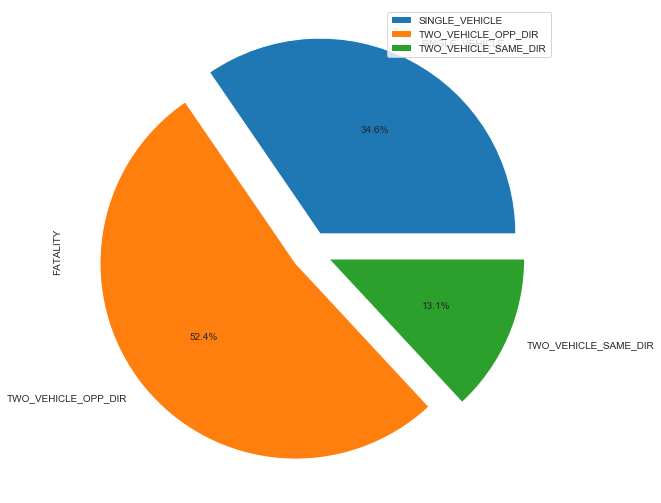

In [115]:
df.groupby(['Collision CONF.']).sum().plot(kind='pie', y='FATALITY',autopct='%1.1f%%',explode=(0.1,0.1,0.1),figsize=(9,9))

<h2>2. Weather</h2>

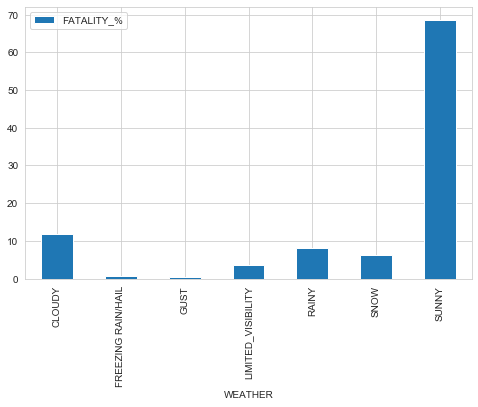

In [117]:
# Add new column to get FATALITY in percentage
df['FATALITY_%'] = df['FATALITY']/df['FATALITY'].sum()*100

#plotting bar graph to view fatality%
df.groupby(['WEATHER']).sum().plot(kind='bar', y='FATALITY_%',figsize=(8,5))


<h2>3. Day & time</h2>

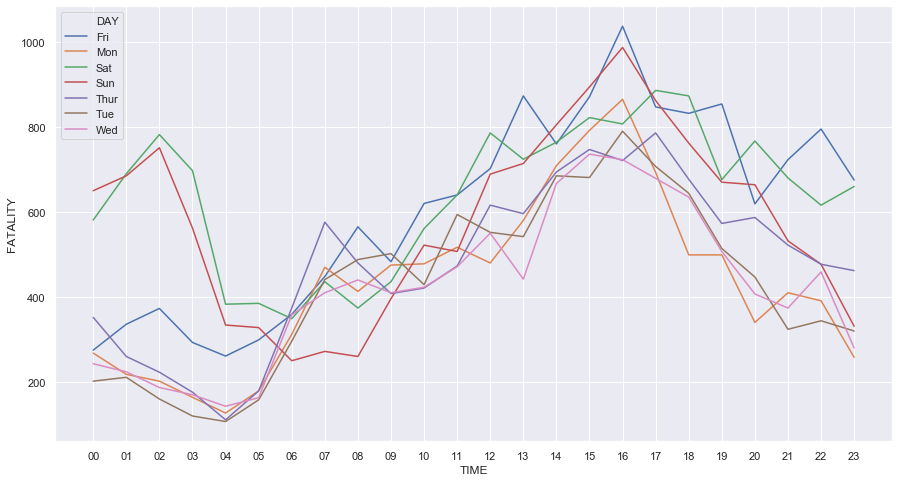

In [118]:
df_grp = df.groupby(['TIME','DAY'])['FATALITY'].sum().reset_index()
# Seaborn Visualisation
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(x='TIME', y='FATALITY',hue='DAY', data=df_grp)


<h2>4. Road surface</h2>

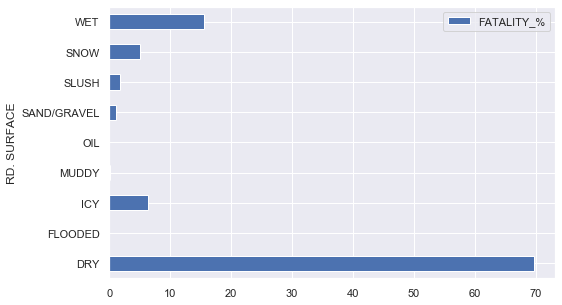

In [119]:
df.groupby(['RD. SURFACE']).sum().plot(kind='barh', y='FATALITY_%',figsize=(8,5))

<h2>5. Gender over years</h2>

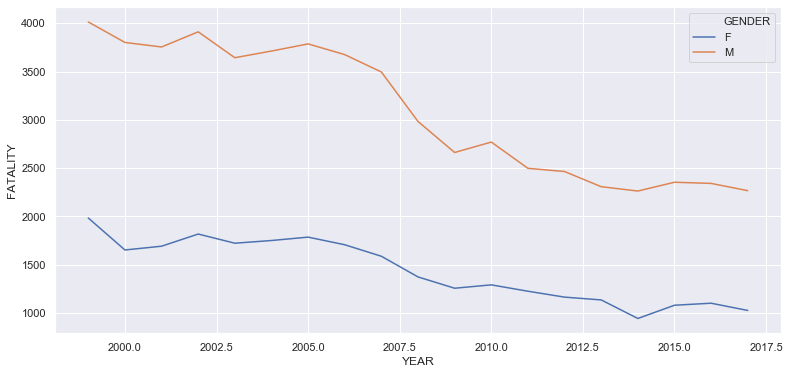

In [120]:
df_grp2 = df.groupby(['YEAR', 'GENDER'])['FATALITY'].sum().reset_index()
# Seaborn Visualisation
sns.set(rc = {'figure.figsize':(13,6)})
ax = sns.lineplot(x='YEAR', y='FATALITY',hue='GENDER', data=df_grp2)

<h2>6. Vehicle Type</h2>

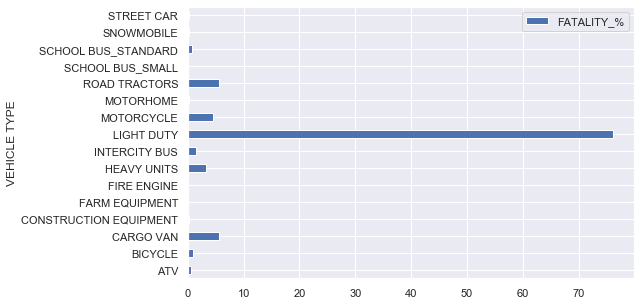

In [121]:
df.groupby(['VEHICLE TYPE']).sum().plot(kind='barh', y='FATALITY_%',figsize=(8,5))

<h1>Findings:</h1>

<p>We can conclude the following results from above analysis:</p>

<ol>
<li> 53.9% fatalities happen due to collision with opposite direction of traffic, 33% with involving single vehicle collisions and 13% with the vehicle travelling in the same direction.</li>
<li> Fatality rate is highest on that NICE SUNNY day, i.e. 69.22%</li>
<li>Highest number of fatalities happen on Friday, 4pm!</li>
<li>69.68% of fatalities happen on dry road surface. Only 6.48% happens on Icy road conditions.</li>
<li>Male fatality rate is almost double of female. Good part is that both have been declining constantly.</li>
<li>77.39% fatalities happen in light duty vehicles e.g. cars, SUV, trucks.</li>
</ol>